In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [41]:
cars_df = pd.read_csv('D:\AILab\Cars93.csv')
columns = ["Manufacturer","Model","Type","Price","MPG.highway","Horsepower","Rear.seat.room","Passengers"]
cars_df[columns].head()

,Manufacturer,Model,Type,Price,MPG.highway,Horsepower,Rear.seat.room,Passengers
0,Acura,Integra,Small,15.9,31,140,26.5,5
1,Acura,Legend,Midsize,33.9,25,200,30.0,5
2,Audi,90,Compact,29.1,26,172,28.0,5
3,Audi,100,Midsize,37.7,26,172,31.0,6
4,BMW,535i,Midsize,30.0,30,208,27.0,4


<Axes: >

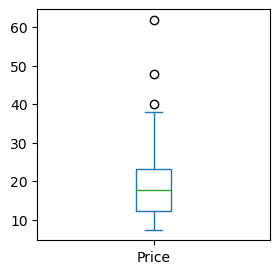

In [42]:
cars_df["Price"].plot(kind = "box",figsize = (3,3))

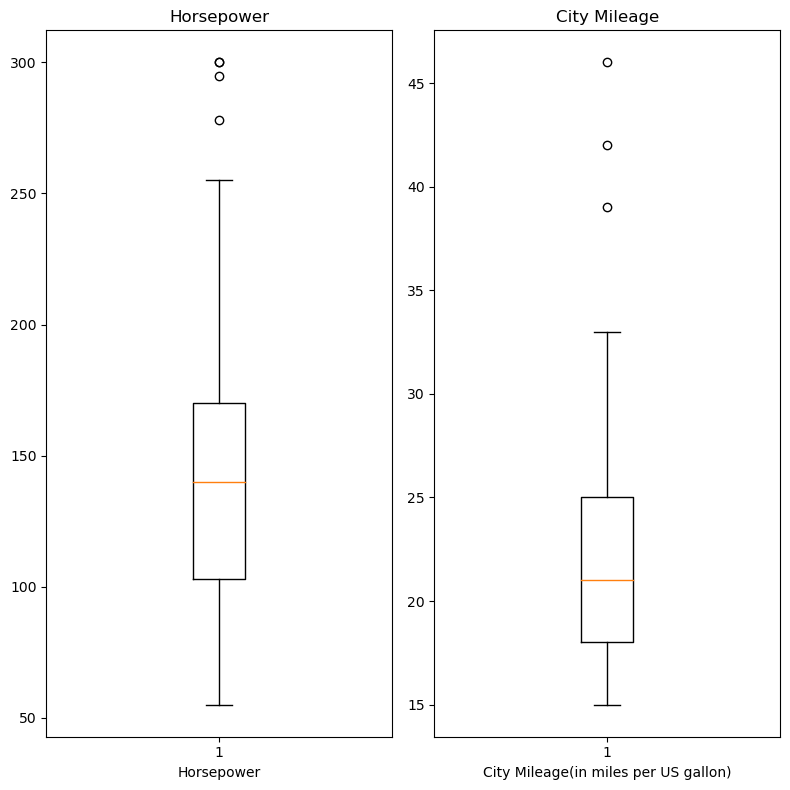

In [43]:
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_figwidth(8)
fig.set_figheight(8)
ax1.boxplot(cars_df["Horsepower"])
ax2.boxplot(cars_df["MPG.city"])
ax1.set_title("Horsepower")
ax1.set_xlabel("Horsepower")
ax2.set_title("City Mileage")
ax2.set_xlabel("City Mileage(in miles per US gallon)")
fig.tight_layout()

# Visualize the distribution of price for each type of car

Text(0.5, 1.0, 'Van')

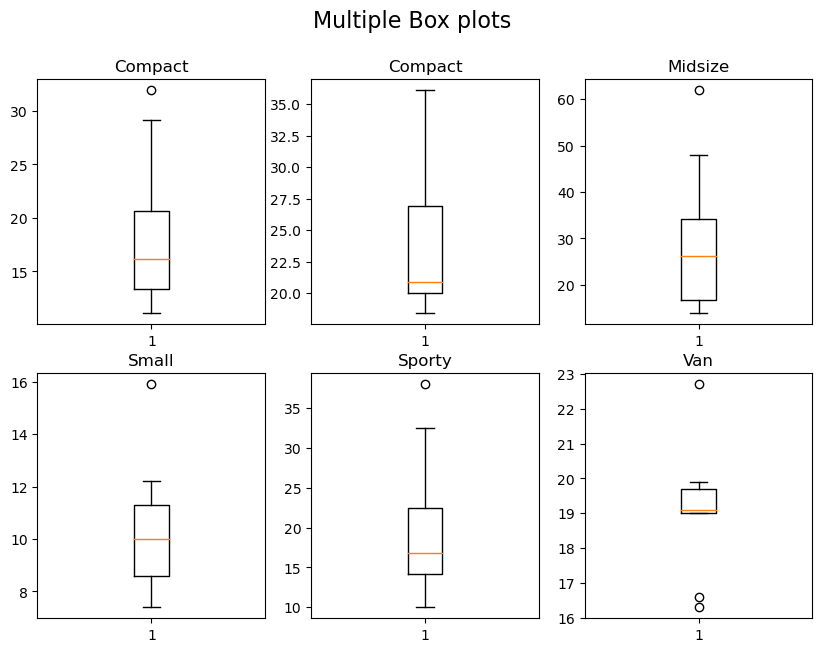

In [44]:
fig,ax = plt.subplots(2,3)
fig.set_figwidth(10)
fig.set_figheight(7)
fig.suptitle("Multiple Box plots",fontsize = 16)
ax[0][0].boxplot(cars_df["Price"][cars_df["Type"] == "Compact"])
ax[0][0].set_title('Compact')
ax[0][1].boxplot(cars_df["Price"][cars_df["Type"] == "Large"])
ax[0][1].set_title('Compact')
ax[0][2].boxplot(cars_df["Price"][cars_df["Type"] == "Midsize"])
ax[0][2].set_title('Midsize')
ax[1][0].boxplot(cars_df["Price"][cars_df["Type"] == "Small"])
ax[1][0].set_title('Small')
ax[1][1].boxplot(cars_df["Price"][cars_df["Type"] == "Sporty"])
ax[1][1].set_title('Sporty')
ax[1][2].boxplot(cars_df["Price"][cars_df["Type"] == "Van"])
ax[1][2].set_title('Van')

# Visualize the correlation between Horsepower and Mileage in the city

Text(0.5, 1.0, 'Horsepower vs MPG.city')

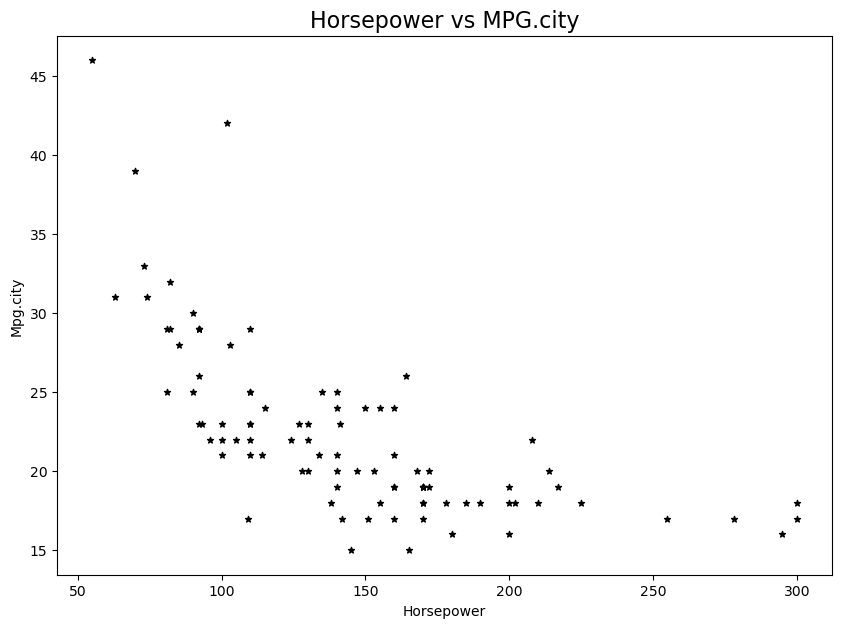

In [45]:
ax = cars_df.plot(["Horsepower"],["MPG.city"],kind = "scatter",color = "black",marker = "*",figsize = (10,7))
ax.set_xlabel("Horsepower")
ax.set_ylabel("Mpg.city")
ax.set_title("Horsepower vs MPG.city",fontsize = 16)

# Visualize the correlation between Horsepower and Mileage in the city for each    type of car 

['Small' 'Midsize' 'Compact' 'Large' 'Sporty' 'Van']


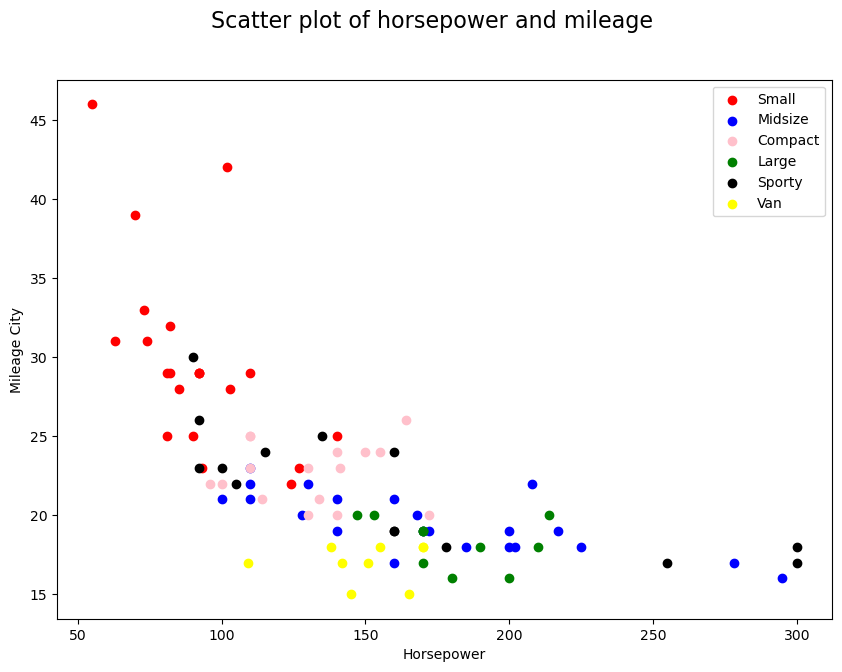

In [46]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(7)
car_type_list = cars_df["Type"].unique()
print(car_type_list)
colors_list = ['red','blue','pink','green','black','yellow']
for car_type,colr in zip(car_type_list,colors_list):
    x = cars_df[cars_df["Type"] == car_type]["Horsepower"]
    y = cars_df[cars_df["Type"] == car_type]["MPG.city"]
    plt.scatter(x,y,color = colr,label = car_type)
plt.suptitle("Scatter plot of horsepower and mileage",fontsize = 16)
plt.xlabel("Horsepower")
plt.ylabel("Mileage City")
plt.legend()

# Visualize and compare Mileage in the city for each type of DriveTrain using a bar chart

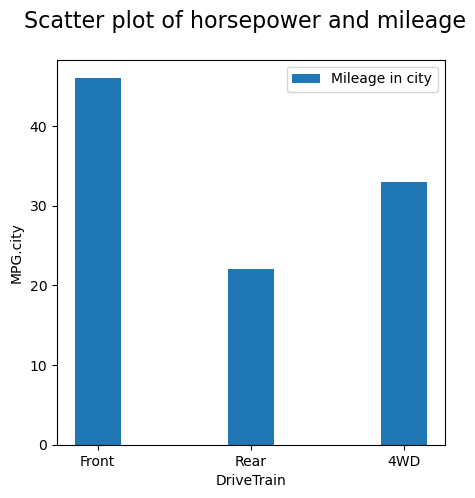

In [47]:
fig = plt.figure()
fig.set_figwidth(5)
fig.set_figheight(5)
plt.bar(cars_df["DriveTrain"],cars_df["MPG.city"],width = 0.3,label = "Mileage in city")
plt.suptitle("Scatter plot of horsepower and mileage",fontsize = 16)
plt.xlabel("DriveTrain")
plt.ylabel("MPG.city")
plt.legend()

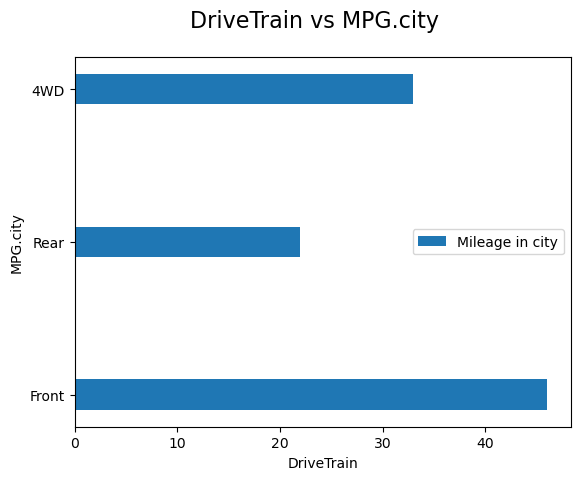

In [48]:
plt.barh(cars_df["DriveTrain"],cars_df["MPG.city"],height = 0.2,label = "Mileage in city")
plt.suptitle("DriveTrain vs MPG.city",fontsize = 16)
plt.xlabel("DriveTrain")
plt.ylabel("MPG.city")
plt.legend()

# Visualise the relationship between "No of Passengers" for each "type of car"      using a stacked bar chart

In [49]:
cars_df["Passengers"].unique()

array([5, 6, 4, 7, 8, 2], dtype=int64)

In [50]:
cars_df["Type"].unique()

array(['Small', 'Midsize', 'Compact', 'Large', 'Sporty', 'Van'],
      dtype=object)

In [51]:
grouped_data = cars_df[["Passengers","Type"]].groupby(by = ["Passengers","Type"]).size()
grouped_data

Passengers  Type   
2           Sporty      2
4           Compact     1
            Midsize     2
            Small       8
            Sporty     12
5           Compact    13
            Midsize    15
            Small      13
6           Compact     2
            Large      11
            Midsize     5
7           Van         8
8           Van         1
dtype: int64

In [52]:
grouped_data = cars_df[["Passengers","Type"]].groupby(by = ["Passengers","Type"]).size().unstack()
grouped_data

Type,Compact,Large,Midsize,Small,Sporty,Van
Passengers,,,,,,
2,NaN,NaN,NaN,NaN,2.0,NaN
4,1.0,NaN,2.0,8.0,12.0,NaN
5,13.0,NaN,15.0,13.0,NaN,NaN
6,2.0,11.0,5.0,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,8.0
8,NaN,NaN,NaN,NaN,NaN,1.0


In [53]:
grouped_data = cars_df[["Passengers","Type"]].groupby(by = ["Passengers","Type"]).size().unstack().reset_index()
grouped_data

Type,Passengers,Compact,Large,Midsize,Small,Sporty,Van
0,2,NaN,NaN,NaN,NaN,2.0,NaN
1,4,1.0,NaN,2.0,8.0,12.0,NaN
2,5,13.0,NaN,15.0,13.0,NaN,NaN
3,6,2.0,11.0,5.0,NaN,NaN,NaN
4,7,NaN,NaN,NaN,NaN,NaN,8.0
5,8,NaN,NaN,NaN,NaN,NaN,1.0


<Axes: xlabel='Passengers'>

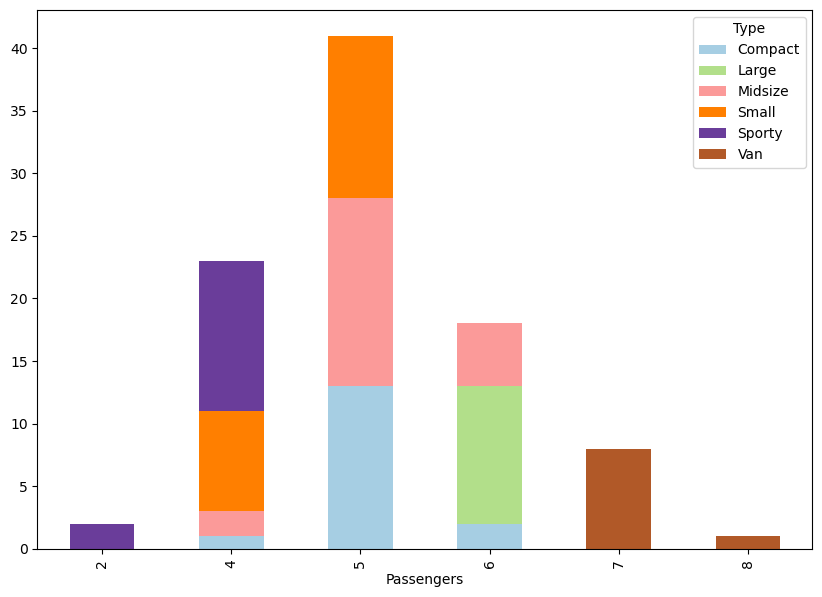

In [58]:
grouped_data.plot(x = "Passengers",kind = "bar",stacked = True,colormap = cm.Paired,figsize = (10,7))